<a href="https://colab.research.google.com/github/denshustanov/ips/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
def fun(img, prepfun):
    return prepfun(np.copy(img))

In [ ]:
def hist(img, range):
    h = np.zeros(range);
    u, c = np.unique(img, return_counts=True)
    counts = list(zip(u, c))
    for val, count in counts:
        h[val] = count;
    return h

def plotHist(img, range):
    fig, axs = plt.subplots(1, 2)
    fig.set_figwidth(15)
    axs[0].imshow(img)
    axs[1].plot(hist(img, range))
    plt.show()

In [ ]:
corey = cv2.imread('corey.png')
corey = cv2.cvtColor(corey, cv2.COLOR_BGR2GRAY)

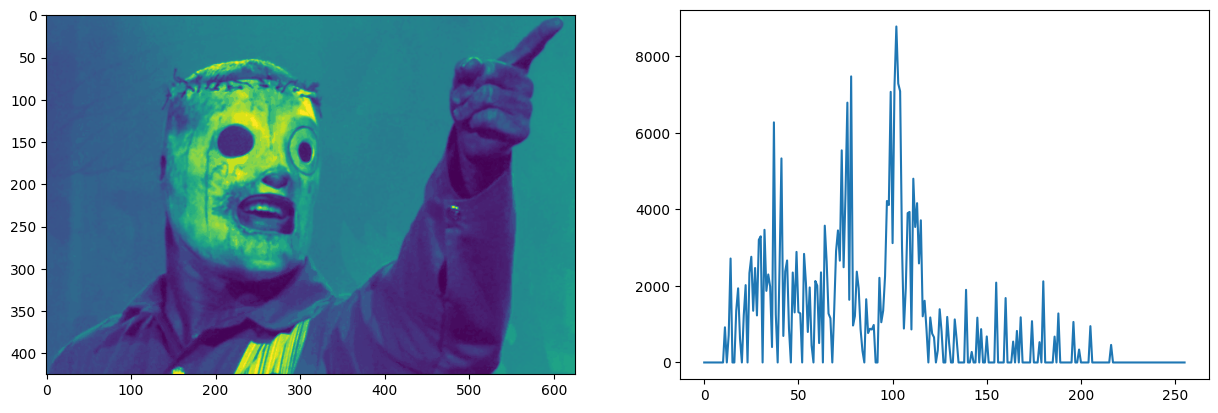

In [ ]:
plotHist(corey, 256)

In [ ]:
def threshFun(threshV, minV, maxV):
    def thresh(img):
        img[img < threshV] = minV;
        img[img >= threshV] = maxV;
        return img;
    return thresh

In [ ]:
test = fun(corey, threshFun(140, 0, 255))

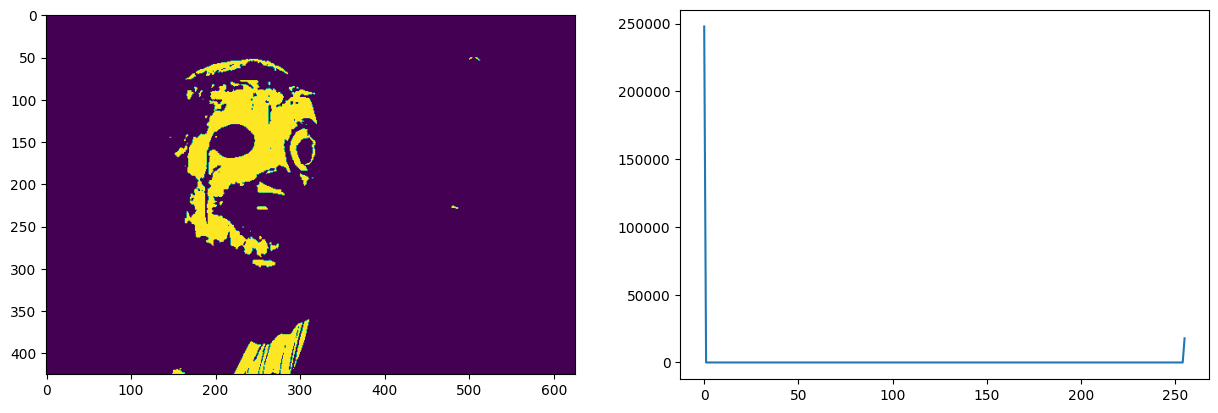

In [ ]:
plotHist(test, 256)

In [ ]:
ret, th = cv2.threshold(corey,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

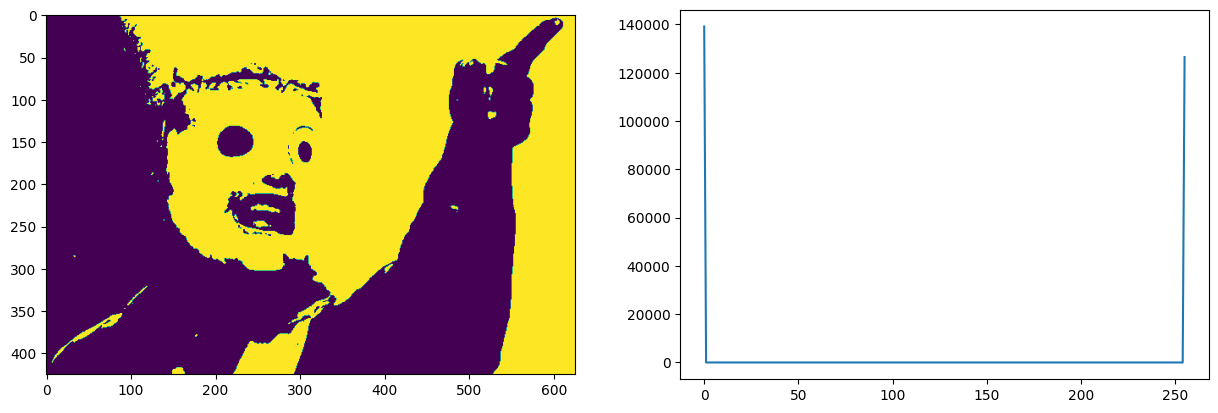

In [ ]:
plotHist(th, 256)

In [ ]:
gaben = cv2.imread('gaben.png').astype(int)

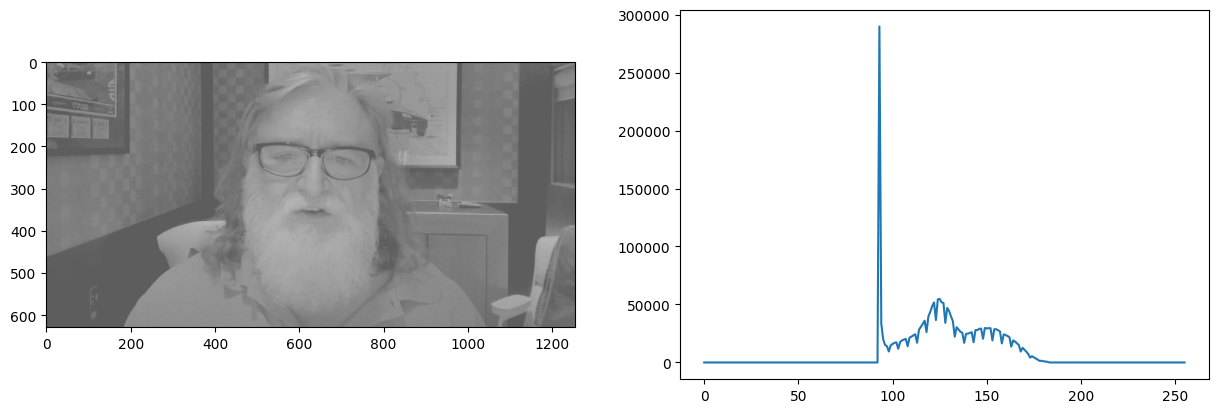

In [ ]:
plotHist(gaben, 256)

In [ ]:
dynamic_range = (gaben.min(), gaben.max())

In [ ]:
dynamic_range

(93, 184)

In [ ]:
def linearPrep(fmin, fmax):
    rsize = fmax-fmin
    print(rsize)
    def prep(img):
        return ((img-fmin)*255/rsize).astype(int)
    return prep

In [ ]:
linear = fun(gaben, linearPrep(*dynamic_range))

91


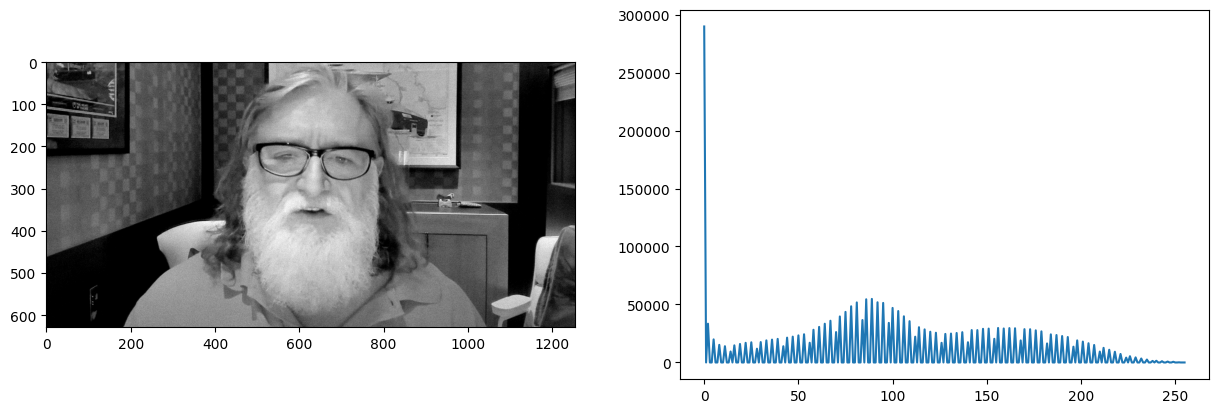

In [ ]:
plotHist(linear, 256)

In [ ]:
def norm(ar):
    return ar/ar.max()

def dist(img, range):
    return norm(hist(img, range).cumsum())

def equalize_histogram(img):
    img_distrib = dist(img, 255)
    def equalize(img1):
        return (255*img_distrib[img1]).astype(int)
    return equalize

In [ ]:
corey_equalized = fun(corey, equalize_histogram(corey))

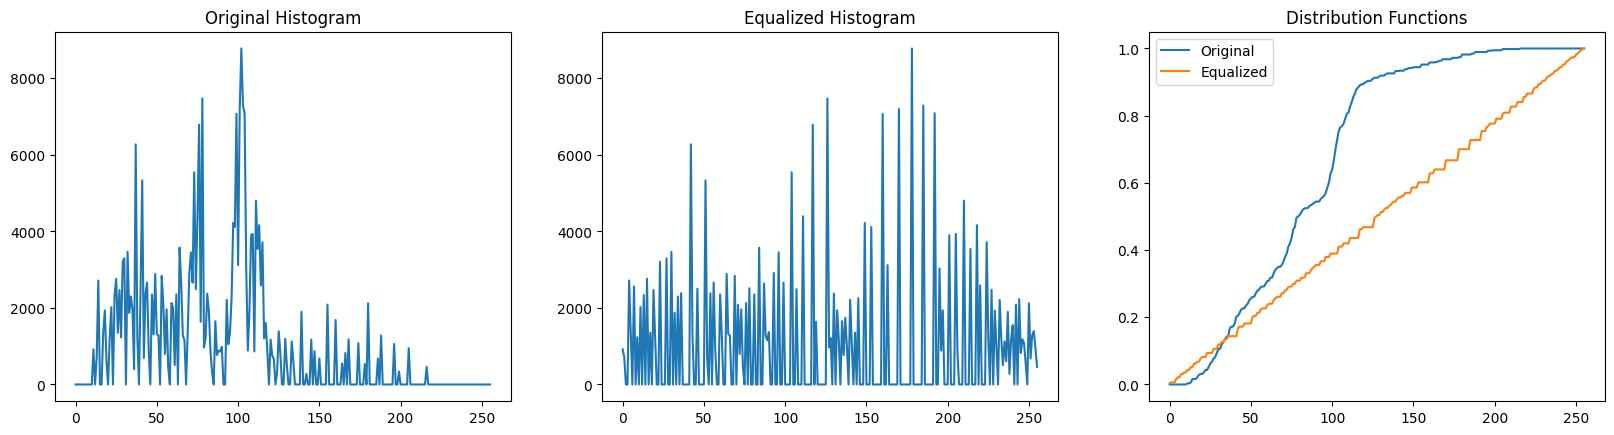

In [ ]:
hist_pre = hist(corey, 256)
hist_eq = hist(corey_equalized, 256)

pre_dist = norm(hist_pre.cumsum())
eq_dist = norm(hist_eq.cumsum())

fig, axs = plt.subplots(1, 3)
axs[0].plot(hist_pre)
axs[1].plot(hist_eq)
axs[2].plot(pre_dist, label='Original')
axs[2].plot(eq_dist, label='Equalized')
axs[2].legend()

axs[0].set_title('Original Histogram')
axs[1].set_title('Equalized Histogram')
axs[2].set_title('Distribution Functions')

fig.set_figwidth(20)
plt.show()

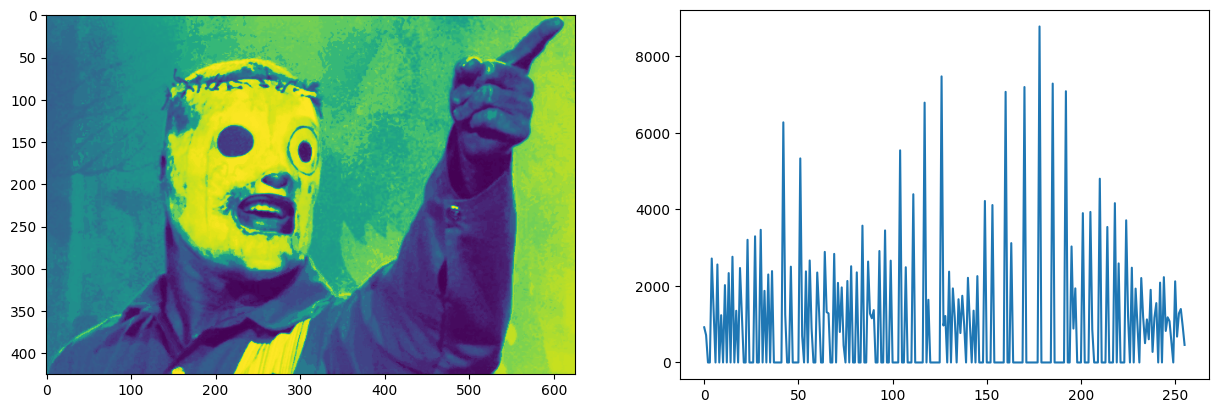

In [ ]:
plotHist(corey_equalized, 256)

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20,20))
corey_eq_clahe = clahe.apply(corey)

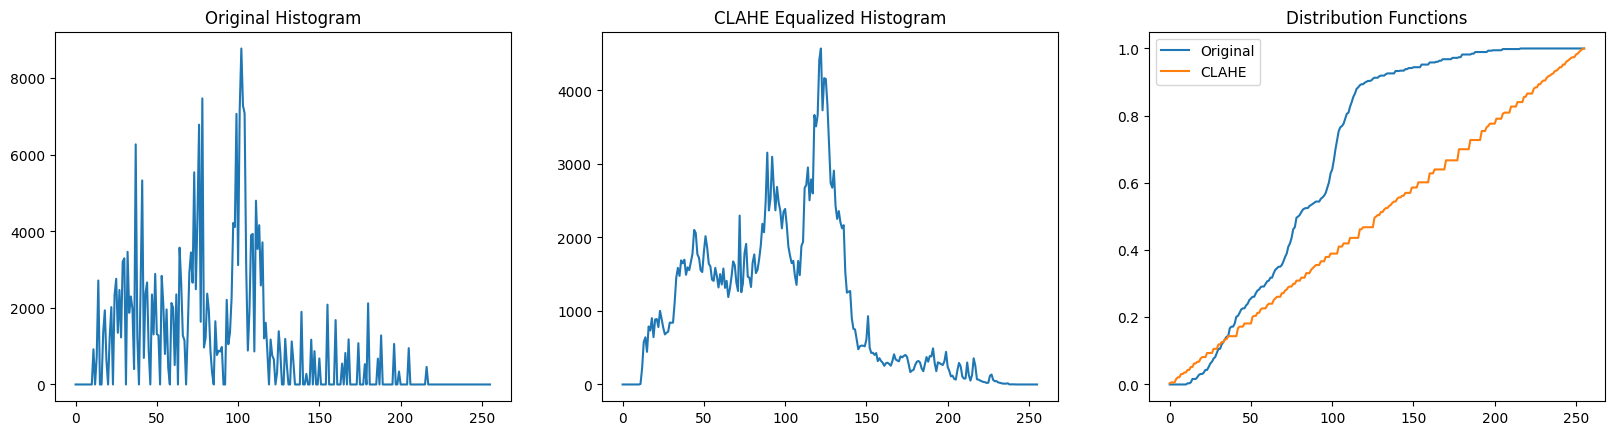

In [ ]:
hist_clahe = hist(corey_eq_clahe, 256)

clahe_dist = norm(hist_eq.cumsum())

fig, axs = plt.subplots(1, 3)
axs[0].plot(hist_pre)
axs[1].plot(hist_clahe)
axs[2].plot(pre_dist, label='Original')
axs[2].plot(clahe_dist, label='CLAHE')
axs[2].legend()

axs[0].set_title('Original Histogram')
axs[1].set_title('CLAHE Equalized Histogram')
axs[2].set_title('Distribution Functions')

fig.set_figwidth(20)
plt.show()

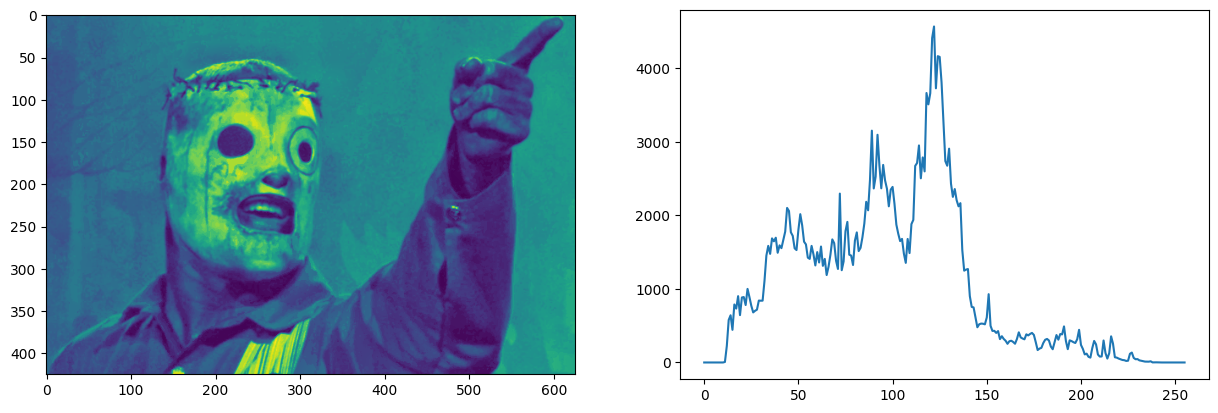

In [ ]:
plotHist(corey_eq_clahe, 256)

In [ ]:
def saw_prep(n_teeth, range):
    tooth = range/n_teeth;
    def prep(img):
        return ((img%tooth)/tooth*255).astype(int)
    return prep

In [ ]:
prep_corey = fun(corey, saw_prep(4, 256))

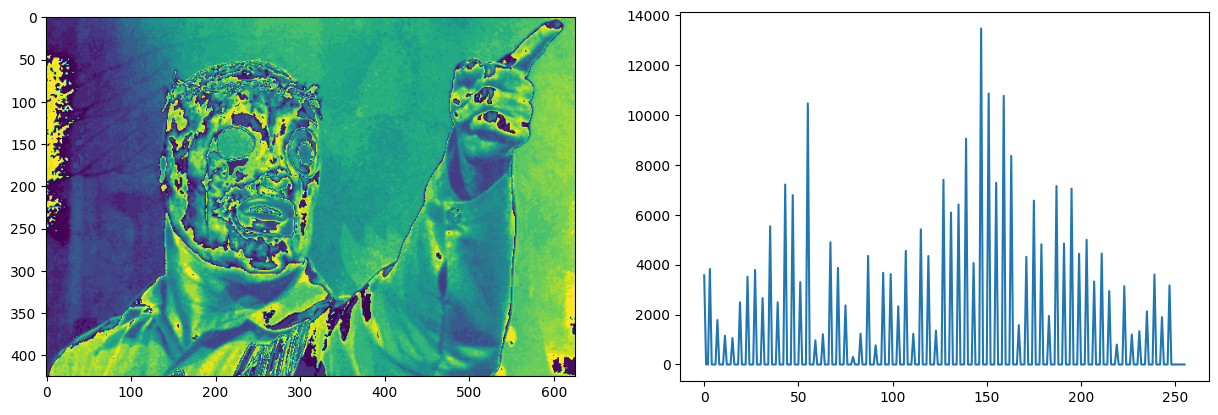

In [ ]:
plotHist(prep_corey, 256)